In [1]:
from comut import comut
import sys 
import os
import pandas as pd
import numpy as np
import palettable
import matplotlib
from matplotlib import rcParams
from matplotlib.ticker import AutoMinorLocator # this function sets the location of the minor tick mark
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import date
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

# import matplotlib.cm as cm
# import seaborn as sns

In [2]:
data_path = 'files/S6_MBC_subtyping.txt'

In [3]:
#load data
data = pd.read_csv(data_path, sep = '\t')#.set_index('sample')
data['sample'] = data['sample'].str.rsplit('_ULP',expand = True)[0]

data = data[data['first_sample']==1]
data = data[data['tumor_fraction']>=0.1]
print(len(data))

101


In [4]:
#sort samples
pos_only = data[(data['primary_ER'].isin(['+','none'])) & (data['met_ER'].isin(['+','none']))]
pos_only = pos_only.sort_values(by = 'tumor_fraction', ascending = False)

neg_only = data[(data['primary_ER'].isin(['-','none'])) & (data['met_ER'].isin(['-','none']))]
neg_only = neg_only.sort_values(by = 'tumor_fraction', ascending = False)

ER_loss = data[(data['primary_ER'].isin(['+','low'])) & (data['met_ER'].isin(['-']))]
ER_loss = ER_loss.sort_values(by = 'tumor_fraction', ascending = False)

ER_low = data[(data['met_ER']=='low')]
ER_low = ER_low.sort_values(by = 'tumor_fraction', ascending = False)

#merge the specified groups
sample_order = pos_only.append(neg_only).append(ER_loss).append(ER_low).reset_index(drop=True).reset_index(drop=True)

#get everything else
complicated = data[~(data['sample'].isin(sample_order['sample']))]
complicated = complicated.sort_values(by= 'tumor_fraction', ascending = False).reset_index(drop=True)
sample_order = sample_order.append(complicated).reset_index(drop=True)

sample_order = list(sample_order['sample'].values)

print(len(sample_order))

101


In [5]:
# minor_locator = AutoMinorLocator(2) # will place minor ticks in between major ticks

#get the continuous data
TF_df = data[['sample','tumor_fraction']]
Prob_ER_pos_df = data[['sample','probability_ER+']]

#get the categorical data in the correct format for comut
primary_ER_df = data[['sample','primary_ER']].rename(columns = {'primary_ER':'value'})
primary_ER_df['value'] = primary_ER_df['value']+'_prim'

met_ER_df = data[['sample','met_ER']].rename(columns = {'met_ER':'value'})
met_ER_df['value'] = met_ER_df['value']+'_met'

ER_df = primary_ER_df.append(met_ER_df)
ER_df['category'] = 'ER_prim/met'
del(primary_ER_df,met_ER_df)

ER_status_df = data[['sample','binary_ER_status']].rename(columns = {'binary_ER_status':'value'})
ER_status_df['category'] = 'ER status'




In [6]:
# #export the ordering for the comut plot
# for_comut = for_supplement[for_supplement['first_sample']==1].copy()
# for_comut['met_ER'] = for_comut['met_ER'].replace('none','unknown')
# for_comut['met_ER'] = for_comut['met_ER'].replace('-','negative')
# for_comut['primary_ER'] = for_comut['primary_ER'].replace('none','unknown')
# for_comut['primary_ER'] = for_comut['primary_ER'].replace('-','negative')

# for_comut = for_comut.sort_values(by=['tumor_fraction'], ascending = False)

# for_comut = for_comut.sort_values(by=['binary_ER_status','met_ER','primary_ER'], ascending = True)
# pd.Series(for_comut.index).to_csv('files/comut_order.csv',index=False)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


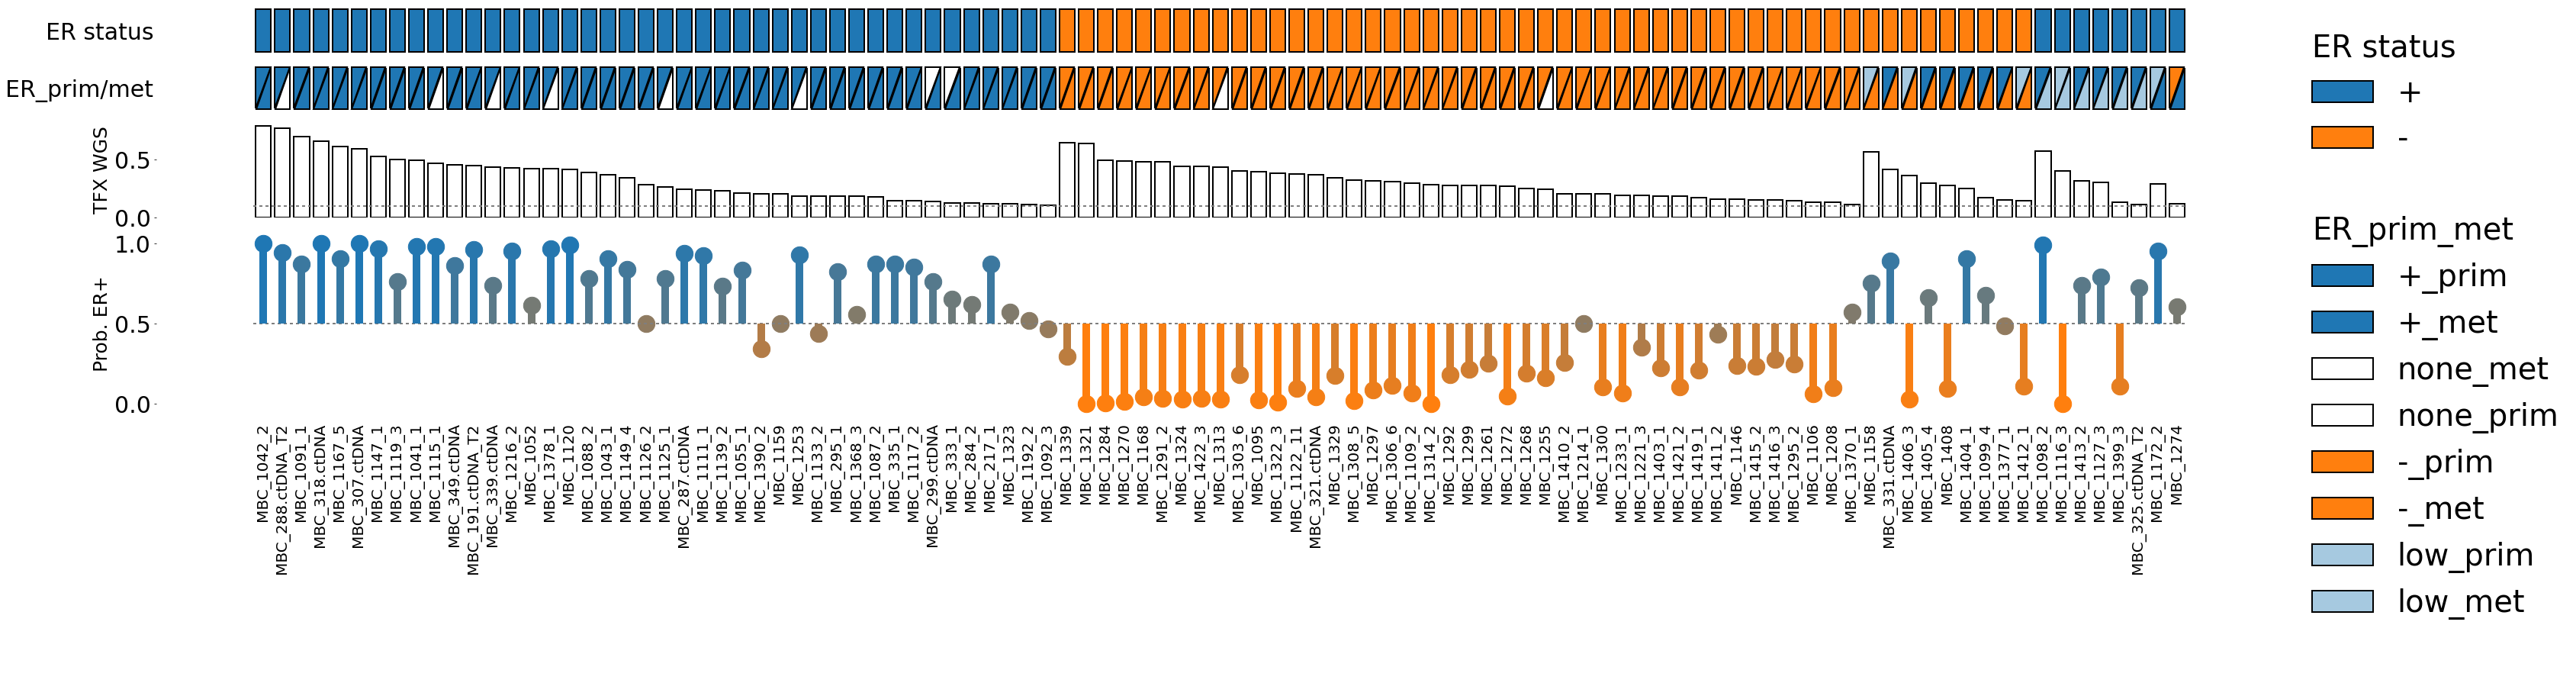

In [7]:
#specify colors for continuous variables
class_mapping = {'+': {'facecolor': 'tab:blue','edgecolor': 'black', 'linewidth': 2},
                 '-': {'facecolor': 'tab:orange', 'edgecolor': 'black', 'linewidth': 2},
                 'none': {'facecolor': 'white','edgecolor': 'black', 'linewidth': 2},
                 'low': {'facecolor': [0.65, 0.79, 0.88],'edgecolor': 'black', 'linewidth': 2},
                 '+_prim': {'facecolor': 'tab:blue','edgecolor': 'black', 'linewidth': 2},
                 '-_prim': {'facecolor': 'tab:orange', 'edgecolor': 'black', 'linewidth': 2},
                 'none_prim': {'facecolor': 'white', 'edgecolor': 'black', 'linewidth': 2},
                 'low_prim': {'facecolor': [0.65, 0.79, 0.88],'edgecolor': 'black', 'linewidth': 2},
                 '+_met': {'facecolor': 'tab:blue','edgecolor': 'black', 'linewidth': 2},
                 '-_met': {'facecolor': 'tab:orange', 'edgecolor': 'black', 'linewidth': 2},
                 'none_met': {'facecolor': 'white', 'edgecolor': 'black', 'linewidth': 2},
                 'low_met': {'facecolor': [0.65, 0.79, 0.88],'edgecolor': 'black', 'linewidth': 2}}


bar_mapping = {'tumor_fraction': 'white','probability_ER+': 'white'}

MBC_comut = comut.CoMut()

# define order of comut BEFORE any data is added
MBC_comut.samples = sample_order

MBC_comut.add_bar_data(Prob_ER_pos_df, name = 'Prob. ER+', mapping = bar_mapping, stacked = False, bar_kwargs = {'width': 0.8, 'edgecolor': 'black', 'linewidth': 2}, ylabel = 'Probability ER+')
MBC_comut.add_bar_data(TF_df, name = 'Tumor frac', mapping = bar_mapping, stacked = False, bar_kwargs = {'width': 0.8, 'edgecolor': 'black', 'linewidth': 2}, ylabel = 'TFX WGS')

# MBC_comut.add_categorical_data(primary_ER_df, name = 'Primary ER', mapping = class_mapping)
# MBC_comut.add_categorical_data(met_ER_df, name = 'Met ER', mapping = class_mapping)
MBC_comut.add_categorical_data(ER_df, name = 'ER_prim_met', mapping = class_mapping, value_order = ['+_prim','-_prim','none_prim','low_prim','+_met','-_met','none_met','low_met'])

MBC_comut.add_categorical_data(ER_status_df, name = 'ER status', mapping = class_mapping)


# global matplotlib params
##how to increase the size of yaxis title?
custom_rcParams = {
	'font.family': 'Arial',
	'font.size': 10, #?
	'axes.titlesize' : 18, #?
	'axes.labelsize': 25, #plot label size
	'legend.fontsize': 40, #legend size
	'xtick.labelsize': 20, #side bar plot x-axis ; patients
	'ytick.labelsize': 30 #gene names and y-axis bar plots 
}

rcParams.update(custom_rcParams)
# heights = {'Prob. ER+': 1, 'Tumor frac': 1, 'Primary ER': .25, 'Met ER': .25, 'ER status': .25}
heights = {'Prob. ER+': 1, 'Tumor frac': .5, 'ER_prim_met': .25, 'ER status': .25}

# move side bar plot slightly closer to comut
wspace = 0.12 #0.18
border_white = ['Absent']


MBC_comut.plot_comut(figsize = (50, 10), heights=heights, wspace = wspace, x_padding = 0.1, y_padding = 0.04, tri_padding = 0.03, subplot_hspace = 0.05, hspace = 0.1)

MBC_comut.add_unified_legend(border_white = border_white, ncol = 1)


######################
MBC_comut.axes['Tumor frac'].plot([-0.05,len(data)+0.05],[0.1,0.1], color = 'tab:grey', dashes = [2,2], linewidth = 2)

#clear probability data and replace with lollypop plot 
xticks = MBC_comut.axes['Prob. ER+'].get_xticks()
xticklabels = MBC_comut.axes['Prob. ER+'].get_xticklabels()
MBC_comut.axes['Prob. ER+'].cla()

sorted_data = data.set_index('sample').loc[sample_order].copy()
cmap = LinearSegmentedColormap.from_list('', ['tab:orange','tab:blue'])
MBC_comut.axes['Prob. ER+'].plot([-0.05,len(sorted_data)+0.05],[0.5,0.5], color = 'tab:grey', dashes = [2,2], linewidth = 2)

for i in range(len(sorted_data)):
    current = sorted_data.iloc[i]
    rgba = cmap(current['probability_ER+'])
    MBC_comut.axes['Prob. ER+'].plot([i+0.5,i+0.5],[0.5,current['probability_ER+']], color = rgba, linewidth = 10, solid_capstyle='butt')
    MBC_comut.axes['Prob. ER+'].scatter([i+0.5],[current['probability_ER+']], color = rgba, s = 500)

#replace the numerical labels with the original sample labels
MBC_comut.axes['Prob. ER+'].set_xticks(xticks)
MBC_comut.axes['Prob. ER+'].set_xticklabels(xticklabels)
MBC_comut.axes['Prob. ER+'].tick_params(axis = 'x', rotation=90)
MBC_comut.axes['Prob. ER+'].set_ylim(-0.1,1.1)
MBC_comut.axes['Prob. ER+'].set_ylabel('Prob. ER+')

#savefig
plt.savefig('plots/comut_plot.pdf', bbox_inches = 'tight', dpi = 300)

plt.show()